## TASK 2 - UNSUPERVISED MACHINE LEARNING

Objective --> We need to do clustering to iris dataset

# IMPORTING LIBRARIES 

In [1]:
# Numeric Python --> Numpy
import numpy as np

# Python Data Analysis Library --> Pandas
import pandas as pd

# Data Visualization Library --> Matplotlib, Seaborn and Plotly
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px

# Filter Warning
from warnings import filterwarnings
filterwarnings('ignore')

# Stratified Split on Train and Test Data
from sklearn.model_selection import train_test_split

# Data Preprocessing Libraries --> Standard scaler and Encoding
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Clustering Libraries
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN


# import functions from scipy to perform clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cophenet

# Clustering Metrics --> Silhoute Score
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score

## IMPORT THE DATA 

In [2]:
# Importing Data Frame with Pandas Library
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## NULL VALUE ANALYSIS

In [5]:
# BELOW CODE GIVES PERCENTAGE OF NULL VALUES IN EACH COLUMN OF THE DATAFRAME
df.isnull().sum()/len(df)*100

Id               0.0
SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
Species          0.0
dtype: float64

Interpretation --> ALL COLUMNS HAS NO NULL VALUE HENCE WE CAN GO FORWARD WITH OUR CLUSTERING

## COLUMNS, ROWS AND DATA TYPE OF EACH COLUMNS

##### Data Type Of Each Columns

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


Interpretation --> All columns are in Correct Data Type According to the data they hold.

##### Number of columns and Rows in the entire Data Set

In [7]:
rows = df.shape[0]
col = df.shape[1]

# printing Rows and Columns
print(f'Number of Rows in the Dataset are {rows}')
print(f'Number of Columns in the Dataset are {col}')

Number of Rows in the Dataset are 150
Number of Columns in the Dataset are 6


##### Numeric and Categorical columns and rows in the Dataframe

In [8]:
df_num = df.select_dtypes('number')
df_cat = df.select_dtypes('object')

# rows and columns in the numeric columns
print(f'Row and columns in the numeric columns {df_num.shape[0]} and {df_num.shape[1]}')
print(f'Row and columns in the categorical columns {df_cat.shape[0]} and {df_cat.shape[1]}')

Row and columns in the numeric columns 150 and 5
Row and columns in the categorical columns 150 and 1


Interpretation --> There are 5 Numeric Columns and 1 Categorical Columns

## DATA PREPROCESSING 

##### REMOVING REDUNDANT DATA FROM BEFORE CLUSTERING

In [12]:
# columns name
col_names = list(df.columns)
print(f'Name of the columns in the dataframe : {col_names}')

Name of the columns in the dataframe : ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


Interpretation --> Id Will not used in the clustering of the data, so we are going to drop the ID columns as it is redundant in data in clustering

In [14]:
df_num = df_num.drop(labels='Id',axis=1)
df_num.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


##### CHECKING DISTRIBUTION OF THE DATA 

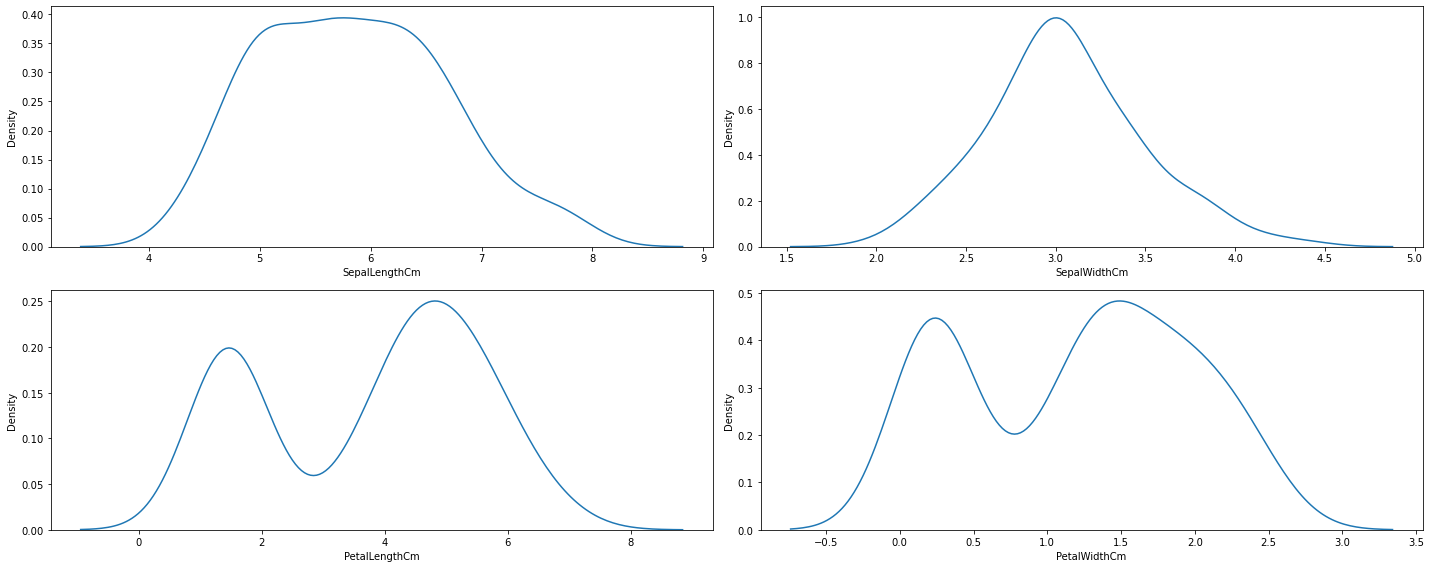

In [40]:
# plot the Kernel Density Plot for each numerical variable --> To check the distribution of the data
# plt.suptitle('Kernel Density Plot For The Numerical Variables',ha = 'center',size = 20)b

# set the number of rows in the subplot using the parameter, 'nrows'
# set the number of columns in the subplot using the parameter, 'ncols'
# 'figsize' sets the figure size
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(20, 8))

# use for loop to plot the boxplot for each variable
for variable, subplot in zip(df_num.columns, ax.flatten()):
    
    # use boxplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.kdeplot(df_num[variable], ax = subplot)

# tight Layout
plt.tight_layout()

# display the plot
plt.show()

Interpretation --> All 4 Normally Distributed

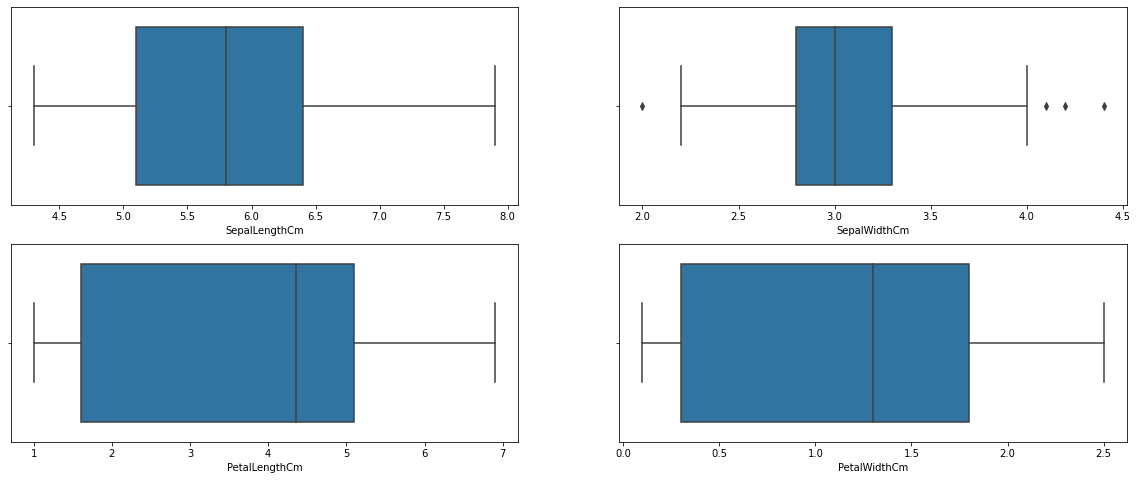

In [32]:
# plot the boxplot for each numerical variable 
# set the number of rows in the subplot using the parameter, 'nrows'
# set the number of columns in the subplot using the parameter, 'ncols'
# 'figsize' sets the figure size
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(20,8))

# use for loop to plot the boxplot for each variable
for variable, subplot in zip(df_num.columns, ax.flatten()):
    
    # use boxplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.boxplot(df_num[variable], ax = subplot)

# display the plot
plt.show()

Interpretation --> There are no Such Significant Outlier in the Data

## SCALING THE DATA

In [43]:
values = SE.fit_transform(df_num)
new_df = pd.DataFrame(data = values , columns=df_num.columns)
new_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


## CLUSTERING

WE ARE GOING TO 2 TYPES OF CLUSTER 
1. KMEAN
2. AGGLOMERATIVE CLUSTERING

### KMEANS CLUSTERING

Let us perform the centroid-based clustering algorithm (i.e. K-Means). Such algorithms are efficient but sensitive to initial conditions and outliers. K-means is the most widely-used centroid-based clustering algorithm.

Here we consider two techniques (elbow/scree plot and Silhouette score) to decide the optimal value of `K` to perform the K-means clustering.

In [93]:
# WCSS --> Within Cluster Sum of Squares
# Considering Empty Dictionary 
wcss = {}
kmean_silhouete_score = {}
for i in range(2,11):
    kmean_clus = KMeans(n_clusters=i,random_state=10)
    kmean_clus.fit(new_df)
    wcss[i] = kmean_clus.inertia_
    predict = kmean_clus.predict(new_df)
    kmean_silhouete_score[i] = silhouette_score(new_df,predict,random_state=10)

#### ELBOW PLOT

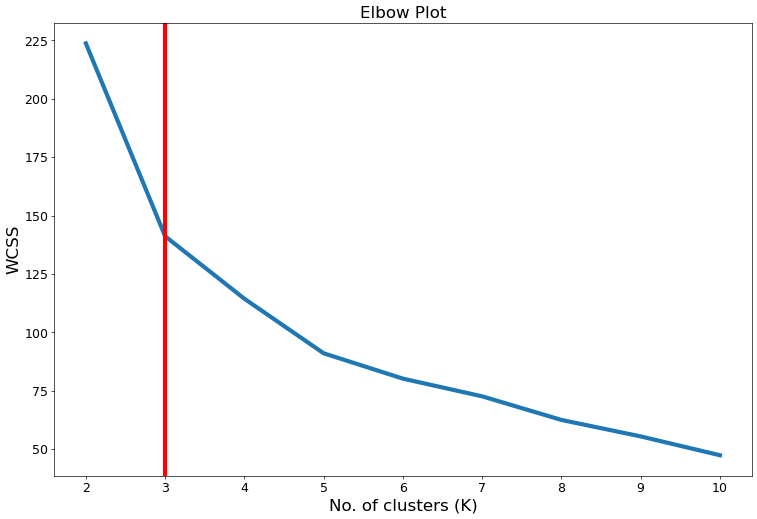

In [94]:
# figure size
plt.figure(figsize=(15,10),dpi = 60)

# visualize the elbow plot to get the optimal value of K
plt.plot(wcss.keys(), wcss.values(),lw = 5,)
plt.axvline(x = 3,color = 'red',lw = 5)

# set the axes and plot labels
plt.xticks(size = 15)
plt.yticks(size = 15)

# set the font size using 'fontsize'
plt.title('Elbow Plot', fontsize = 20)
plt.xlabel('No. of clusters (K)', fontsize = 20)
plt.ylabel('WCSS', fontsize = 20)

# display the plot
plt.show()

#### BAR PLOT FOR SILHOUTE SCORE

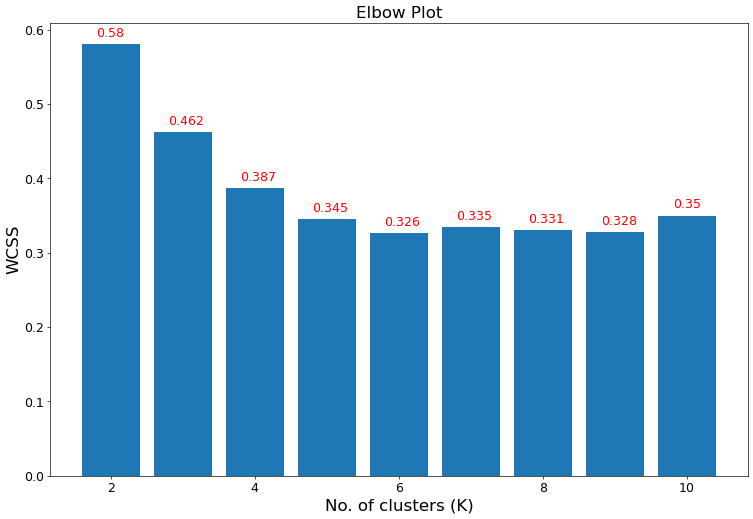

In [108]:
# figure size
plt.figure(figsize=(15,10),dpi = 60)

# barplot 
plt.bar(x = kmean_silhouete_score.keys(),height=kmean_silhouete_score.values())

# text in barchart
for key,value in kmean_silhouete_score.items():
    plt.text(x = key-0.2,y = value+0.01,s = f'{round(value,3)}',fontdict={'size':15,'color':'red'})

# set the axes and plot labels
plt.xticks(size = 15)
plt.yticks(size = 15)

# set the font size using 'fontsize'
plt.title('Elbow Plot', fontsize = 20)
plt.xlabel('No. of clusters (K)', fontsize = 20)
plt.ylabel('WCSS', fontsize = 20)

# display the plot
plt.show()

#### AGGLOMERATIVE CLUSTERING

It is the hierarchy based clustering method. `Agglomerative` and `Divisive` clustering are the two types of hierarchical clustering. 

Agglomerative clustering --> In this method, each data point is considered as a single cluster and these clusters are grouped to form bigger clusters and eventually the single cluster of all the observations is created.

In [91]:
# Silhoute Score
agg_silhouete_score = {}

# agglomerative clusting to get silhoute score
for i in range (2,11):
    agg = AgglomerativeClustering(n_clusters=i)
    agg_cluster = agg.fit(new_df)
    predict = agg_cluster.fit_predict(new_df)
    agg_silhouete_score[i] = silhouette_score(new_df,predict,random_state=10)

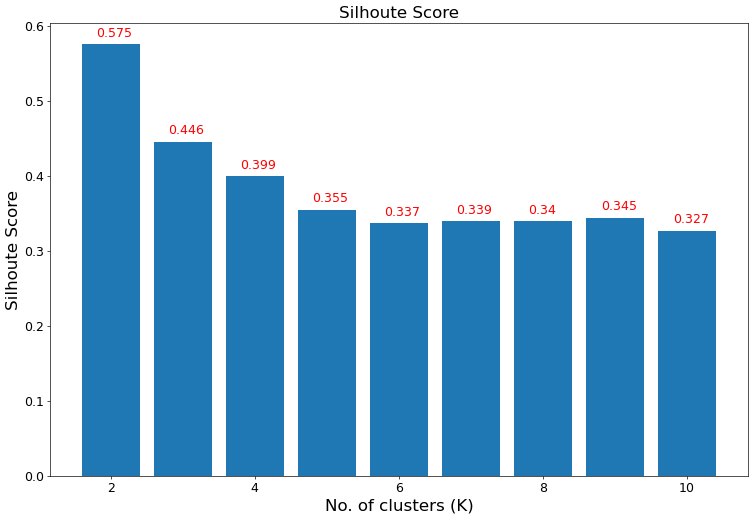

In [109]:
# figure size
plt.figure(figsize=(15,10),dpi = 60)

# barplot 
plt.bar(x = agg_silhouete_score.keys(),height=agg_silhouete_score.values())

# adding text
for key,value in agg_silhouete_score.items():
    plt.text(x = key-0.2,y = value+0.01,s = f'{round(value,3)}',fontdict={'size':15,'color':'red'})
    
# set the axes and plot labels
plt.xticks(size = 15)
plt.yticks(size = 15)

# set the font size using 'fontsize'
plt.title('Silhoute Score', fontsize = 20)
plt.xlabel('No. of clusters (K)', fontsize = 20)
plt.ylabel('Silhoute Score', fontsize = 20)

# display the plot
plt.show()

# FINAL MODEL

For Final Model K-Mean Model and Value of K=3

In [115]:
# K-Mean 
final_model = KMeans(n_clusters=3,random_state=10)
final_model_mean = final_model.fit(new_df)

# Labels in the dataset
df['Cluster'] = final_model_mean.labels_

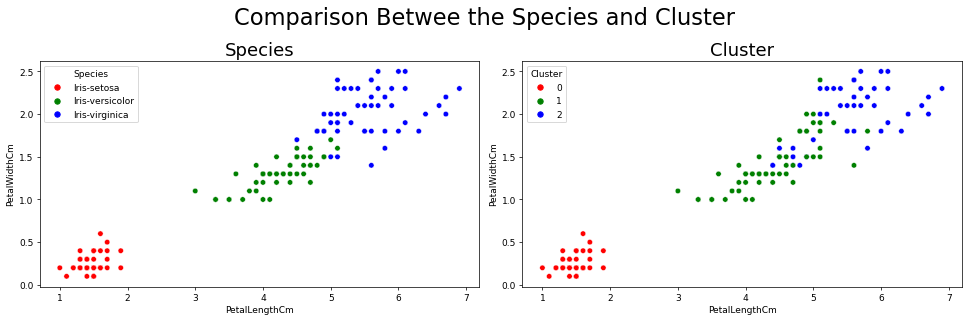

In [130]:
# Using Scatter Plot to see Separation Between cluster
# figure size 
plt.figure(figsize=(15,5),dpi = 65)

# subplot title
plt.suptitle('Comparison Betwee the Species and Cluster',size = 25)

# 1st Plot
plt.subplot(1,2,1)
sns.scatterplot(data = df, x = 'PetalLengthCm',y = 'PetalWidthCm', hue='Species',
                palette=['red','green','blue'],markers=['^'])
plt.title('Species',size = 20)

# 2nd Plot
plt.subplot(1,2,2)
sns.scatterplot(data = df, x = 'PetalLengthCm',y = 'PetalWidthCm', hue='Cluster',
                palette=['red','green','blue'],markers=['^'])
plt.title('Cluster',size = 20)

# layout
plt.tight_layout()

# show()
plt.show()

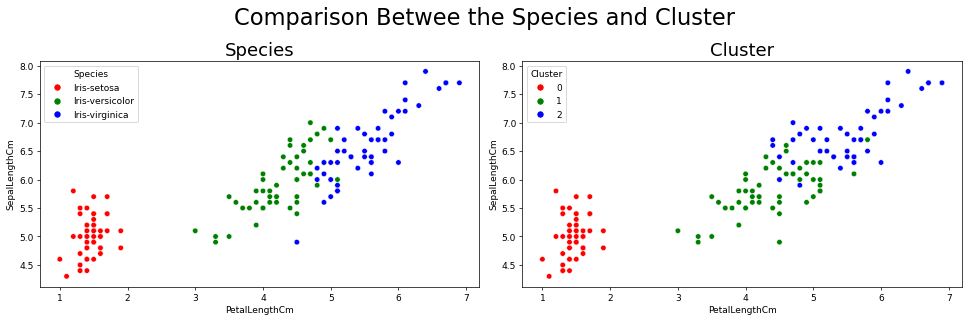

In [131]:
# Using Scatter Plot to see Separation Between cluster
# figure size 
plt.figure(figsize=(15,5),dpi = 65)

# subplot title
plt.suptitle('Comparison Betwee the Species and Cluster',size = 25)

# 1st Plot
plt.subplot(1,2,1)
sns.scatterplot(data = df, x = 'PetalLengthCm',y = 'SepalLengthCm', hue='Species',
                palette=['red','green','blue'],markers=['^'])
plt.title('Species',size = 20)

# 2nd Plot
plt.subplot(1,2,2)
sns.scatterplot(data = df, x = 'PetalLengthCm',y = 'SepalLengthCm', hue='Cluster',
                palette=['red','green','blue'],markers=['^'])
plt.title('Cluster',size = 20)

# layout
plt.tight_layout()

# show()
plt.show()

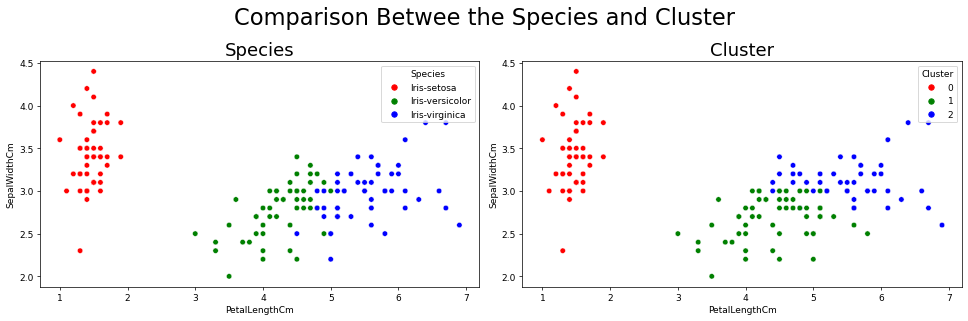

In [129]:
# Using Scatter Plot to see Separation Between cluster
# figure size 
plt.figure(figsize=(15,5),dpi = 65)

# subplot title
plt.suptitle('Comparison Betwee the Species and Cluster',size = 25)

# 1st Plot
plt.subplot(1,2,1)
sns.scatterplot(data = df, x = 'PetalLengthCm',y = 'SepalWidthCm', hue='Species',
                palette=['red','green','blue'],markers=['^'])
plt.title('Species',size = 20)

# 2nd Plot
plt.subplot(1,2,2)
sns.scatterplot(data = df, x = 'PetalLengthCm',y = 'SepalWidthCm', hue='Cluster',
                palette=['red','green','blue'],markers=['^'])
plt.title('Cluster',size = 20)

# layout
plt.tight_layout()

# show()
plt.show()